In [1]:
import sklearn, pandas

# Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
sales = pandas.read_csv("home_data.csv")

In [3]:
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

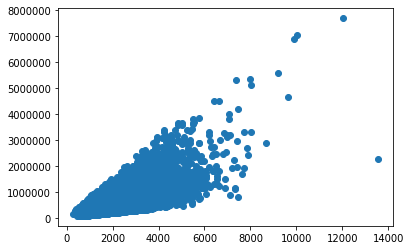

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=sales["sqft_living"],y=sales["price"])

# Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [5]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(sales,train_size=0.8,test_size=0.2, random_state=0)

## Build the regression model using only sqft_living as a feature

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
sqft_model = LinearRegression()
sqft_model.fit(np.reshape(train_data["sqft_living"].values, [-1, 1]),train_data["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Evaluate the simple model

In [7]:
print(test_data['price'].mean())

529242.6106870229


In [8]:
prediction = sqft_model.predict(np.reshape(test_data["sqft_living"].values, [-1, 1]))
labels = test_data['price']

print(np.sqrt(sklearn.metrics.mean_squared_error(labels.values, prediction)))

248879.06143647005


RMSE of about \$248,879\$!

# Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

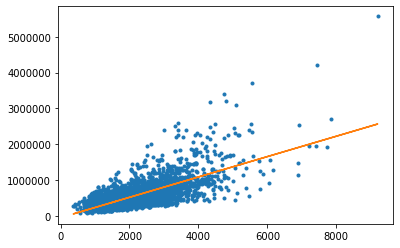

In [10]:
plt.plot(test_data['sqft_living'],
         test_data['price'],'.',
         test_data['sqft_living'],
         sqft_model.predict(np.reshape(test_data["sqft_living"].values, [-1, 1])),
         '-')


Above:  blue dots are original data, orange line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [11]:
sqft_model.coef_

array([283.96855737])

# Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [12]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [13]:
sales[my_features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
3,4,3.00,1960,5000,1.0,98136
4,3,2.00,1680,8080,1.0,98074
...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,98103
21609,4,2.50,2310,5813,2.0,98146
21610,2,0.75,1020,1350,2.0,98144
21611,3,2.50,1600,2388,2.0,98027


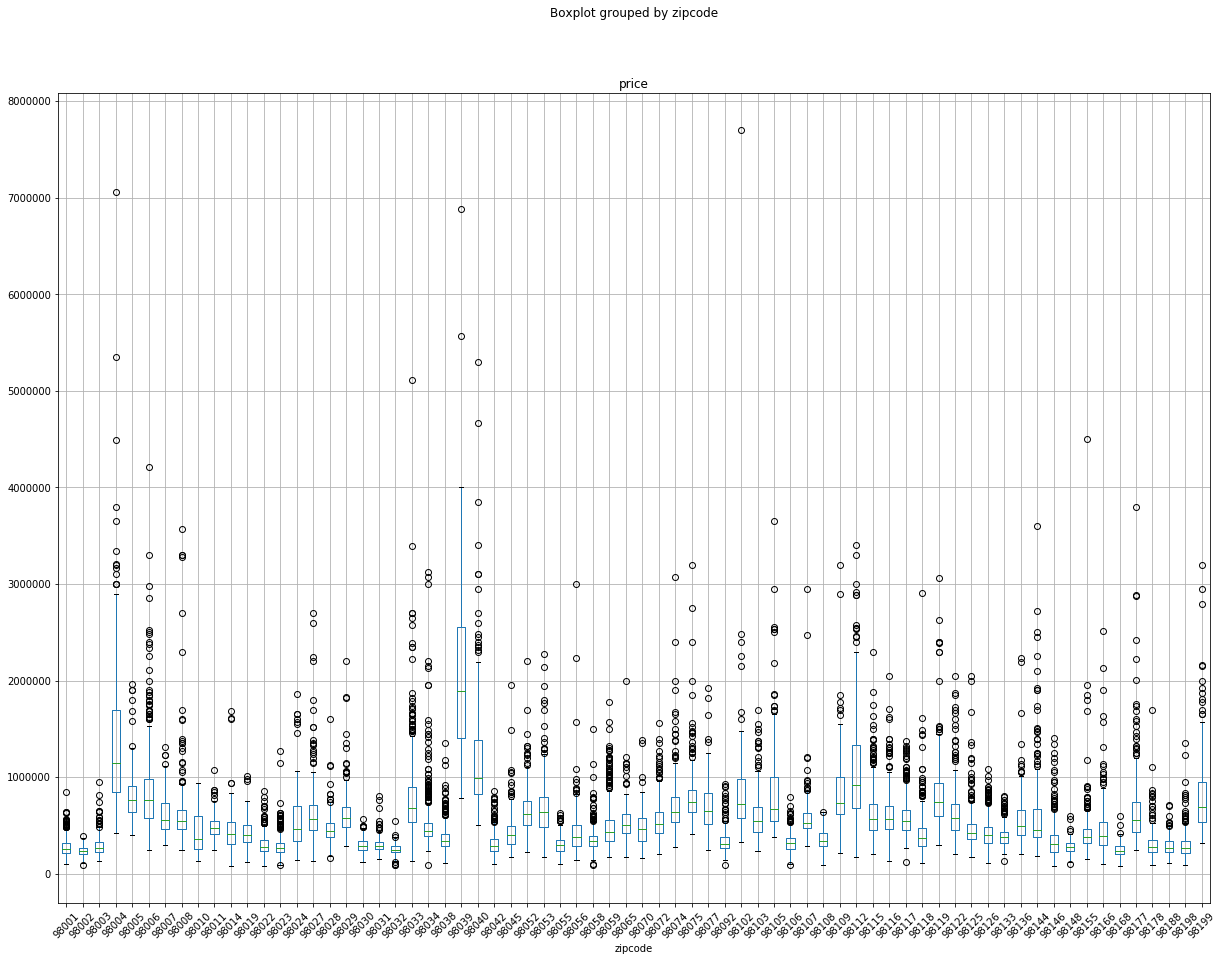

In [14]:
#data = sales[["zipcode","price"]].values
ax = sales.boxplot(column="price", by="zipcode", rot=45, figsize=(20, 15))

Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

# Build a regression model with more features

In [15]:
my_features_model = LinearRegression()
my_features_model.fit(train_data[my_features].values,train_data["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print(my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


## Comparing the results of the simple model with adding more features

In [17]:
labels = test_data['price']

prediction = sqft_model.predict(np.reshape(test_data["sqft_living"].values, [-1, 1]))
print(np.sqrt(sklearn.metrics.mean_squared_error(labels.values, prediction)))

prediction = my_features_model.predict(test_data[my_features].values)
print(np.sqrt(sklearn.metrics.mean_squared_error(labels.values, prediction)))

248879.06143647005
244004.77443104124


The RMSE goes down from \$248.879\$ to \$244,004\$ with more features.

# Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [18]:
house1 = sales.loc[sales['id']==5309101200]

In [19]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


<img src="http://info.kingcounty.gov/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [20]:
print(house1['price'])

1054    620000
Name: price, dtype: int64


In [21]:
print(sqft_model.predict(np.reshape(house1["sqft_living"].values, [-1, 1])))

[633267.47422744]


In [22]:
print(my_features_model.predict(house1[my_features].values))

[637556.26515925]


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

##Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [32]:
house2 = sales.loc[sales['id']==1925069082]

In [33]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [25]:
print(sqft_model.predict(np.reshape(house2["sqft_living"].values, [-1, 1])))

[1269357.04273158]


In [26]:
print(my_features_model.predict(house2[my_features].values))

[1274443.76531345]


In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

##Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [27]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [28]:
bill_gates=pandas.DataFrame.from_dict(bill_gates)
print(my_features_model.predict(bill_gates[my_features].values))

[15796988.23574103]


The model predicts a price of over $15M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)